# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [83]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [84]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [85]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [86]:
df_train.shape

(15223, 52)

In [87]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [88]:
df_test.shape

(14910, 52)

In [89]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [90]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [91]:
df = df_test.append(df_train).reset_index(drop=True)

In [92]:
df.shape

(30133, 53)

In [93]:
df.head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [95]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Неполное среднее', 'Ученая степень', 'Высшее', 'Неоконченное высшее', 'Среднее специальное', 'Два и более высших образования'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Государственная служба', 'Салоны красоты и здоровья', 'Недвижимость', 'Логистика', 'Энергетика', 'Сельское хозяйство', 'Другие сферы', 'Управляющая компания', 'Наука', 'Страхование', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Подбор персонала', 'Банк/Финансы', 'Сборочные производства', 'Торговля', 'Информационные услуги', 'Строительство', 'ЧОП/Детективная д-ть', 'Здравоохранение', 'Туризм', 'Образование', 'Развлечения/Искусство', 'Информационные технологии', 'Нефтегазовая промышленность'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [96]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [97]:
# Есть, по 9 столбцам. 
# Их можно заменить на конкретные числовые значения fillna() (например, ноль или среднее значение по столбцу).
# Либо если пропусков слишком много, то можно удалить столбец/строку целиком (dropna). 
pd.isnull(df).sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [98]:
# Да, все данные с типом столбца object (за исключением данных типа float, написанных через ",", а не "."). Например, EDUCATION, GEN_INDUSTRY
# и др. Им можно присвоить коды. 


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [99]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output.drop('AGREEMENT_RK', axis = 1, inplace = True)
    df_output.fillna(0)   
    df_output['PERSONAL_INCOME']=pd.to_numeric(df['PERSONAL_INCOME'].str.replace(',', '.'))
    df_output['CREDIT']=pd.to_numeric(df['CREDIT'].str.replace(',', '.'))
    df_output['FST_PAYMENT']=pd.to_numeric(df['FST_PAYMENT'].str.replace(',', '.'))
    df_output['LOAN_AVG_DLQ_AMT']=pd.to_numeric(df['LOAN_AVG_DLQ_AMT'].str.replace(',', '.'))
    df_output['LOAN_MAX_DLQ_AMT']=pd.to_numeric(df['LOAN_MAX_DLQ_AMT'].str.replace(',', '.'))
    df_output = pd.get_dummies(df_output, columns = ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'FAMILY_INCOME', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])
    df_output['WORK_TIME'].fillna(0)
    return df_output

preproc_data(df.head(10))

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,TP_PROVINCE_Хабаровский край,TP_PROVINCE_Читинская область,REGION_NM_ВОСТОЧНО-СИБИРСКИЙ,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,1,1,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,1,0,0,1,0,0,0,0,0,0
5,0,44,0,1,0,2,2,7000.0,1,1,...,0,0,0,0,0,0,1,0,0,0
6,0,57,1,0,1,0,0,10000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
7,0,33,1,0,1,2,2,7500.0,1,1,...,0,0,0,0,1,0,0,0,0,0
8,0,53,0,1,1,2,0,9000.0,1,1,...,0,0,0,0,1,0,0,0,0,0
9,1,33,1,0,0,1,0,4000.0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [100]:
# операцией df_output.fillna(0) (см выше) удалились все пропуски, кроме столбца 'WORK_TIME' (почему-то). Поэтому пришлось работать с ним отдельно. 

df = df.fillna(0)

In [101]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [102]:
pd.isnull(df_test_preproc).sum()

TARGET                              0
AGE                                 0
SOCSTATUS_WORK_FL                   0
SOCSTATUS_PENS_FL                   0
GENDER                              0
CHILD_TOTAL                         0
DEPENDANTS                          0
PERSONAL_INCOME                     0
REG_FACT_FL                         0
FACT_POST_FL                        0
REG_POST_FL                         0
REG_FACT_POST_FL                    0
REG_FACT_POST_TP_FL                 0
FL_PRESENCE_FL                      0
OWN_AUTO                            0
AUTO_RUS_FL                         0
HS_PRESENCE_FL                      0
COT_PRESENCE_FL                     0
GAR_PRESENCE_FL                     0
LAND_PRESENCE_FL                    0
CREDIT                              0
TERM                                0
FST_PAYMENT                         0
DL_DOCUMENT_FL                      0
GPF_DOCUMENT_FL                     0
FACT_LIVING_TERM                    0
WORK_TIME   

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [142]:
x = df_train_preproc.drop(['TARGET'], axis = 1)

x_test = df_test_preproc.drop(['TARGET'], axis = 1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

x.shape, x_test.shape, y.shape, y_test.shape

((15223, 454), (14910, 454), (15223,), (14910,))

#### Задание 5. Обучение и оценка качества разных моделей

In [104]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
x_train, x_valid, y_train, y_valid = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)


In [105]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict1 = dtc.predict(x_valid)


In [106]:
predict1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [107]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predict2 = rfc.predict(x_valid)

In [108]:
predict2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predict3 = lr.predict_proba(x_valid)

In [110]:
predict3

array([[0.73135442, 0.26864558],
       [0.94169386, 0.05830614],
       [0.79461005, 0.20538995],
       ...,
       [0.95622104, 0.04377896],
       [0.94280843, 0.05719157],
       [0.86043517, 0.13956483]])

In [111]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_valid, predict1))
print(accuracy_score(y_valid, predict2))

1.0
0.9930334394904459


In [112]:
print(precision_score(y_valid, predict1))
print(precision_score(y_valid, predict2))

1.0
1.0


In [113]:
print(recall_score(y_valid, predict1))
print(recall_score(y_valid, predict2))

1.0
0.9426229508196722


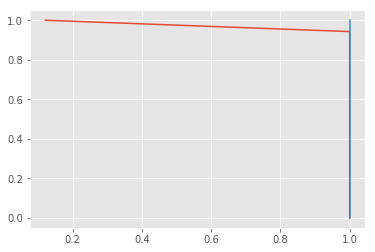

In [124]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
precision1, recall1, _ = precision_recall_curve(y_valid, predict1)
precision2, recall2, _ = precision_recall_curve(y_valid, predict2)
#precision3, recall3, _ = precision_recall_curve(y_valid, predict3)
plt.plot(precision2,recall2)
plt.plot(precision1,recall1)



1.0
0.9713114754098361


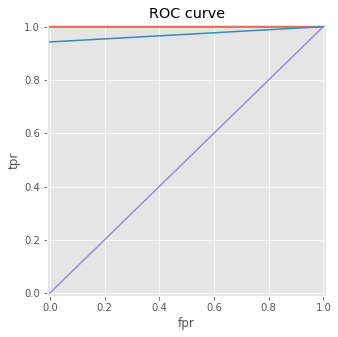

In [127]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, predict1)
fpr1, tpr1, thresholds1 = roc_curve(y_valid, predict2)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr1,tpr1)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print(roc_auc_score(y_valid, predict1))
print(roc_auc_score(y_valid, predict2))

In [133]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
print(cross_val_score(
    rfc,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
))
print()
print(cross_val_score(
    dtc,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
))
print()
print(cross_val_score(
    lr,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
))

[0.99990583 0.99999181 0.99992584 0.99946441 0.99940879 0.99992172
 1.         0.99971984 0.99948913 0.99943145]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[0.75778729 0.73828371 0.75639108 0.73419276 0.9253917  0.73476543
 0.75749523 0.95153695 1.         0.97024155]


In [155]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predict4 = dtc.predict(x_test)
predict4
## Your Code Here

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

0.5243161094224924


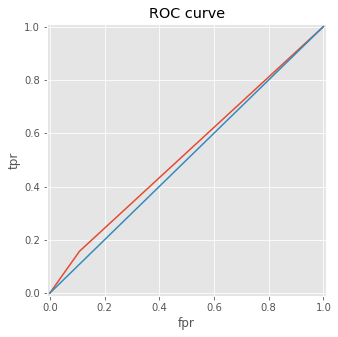

In [156]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict4)
plt.figure(figsize=(5, 5))
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print(roc_auc_score(y_test, predict4))
## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)